In [388]:
import webbrowser
import os
import requests
import bs4
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [389]:
"""
과제 (다음주 목요일까지)
멜론, 벅스, 지니 사이트에서
웹 크롤링 하여
음악순위 탑 50 가져오기 (순위, 곡제목, 가수)
각각 엑셀로 저장하여 (총 3개 - 멜론, 벅스, 지니)
토탈 음악파일 엑셀 1개로 합치기
시각화하여 표현하기
"""

'\n과제 (다음주 목요일까지)\n멜론, 벅스, 지니 사이트에서\n웹 크롤링 하여\n음악순위 탑 50 가져오기 (순위, 곡제목, 가수)\n각각 엑셀로 저장하여 (총 3개 - 멜론, 벅스, 지니)\n토탈 음악파일 엑셀 1개로 합치기\n시각화하여 표현하기\n'

In [390]:
# -------------------------------------------
# 멜론 100 순위
# -------------------------------------------


# 멜론 실시간 차트 페이지 URL
melon_url = 'https://www.melon.com/chart/index.htm'

# 멜론은 기본적인 요청을 차단하는 경우가 많아서 User-Agent 헤더를 반드시 넣어야 함
# 일반적인 웹 브라우저(Chrome)에서 접속한 것처럼 위장하는 역할을 함.
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 멜론 차트 페이지에 GET 요청 보내기 (헤더 포함)
response = requests.get(melon_url, headers = headers)

# 인코딩을 UTF-8로 설정 (간혹 멜론이 CP949로 잡힐 때가 있어 강제 지정)
response.encoding = 'UTF-8'

# 응답(response)에서 HTML 문서를 텍스트 형태로 추출
html_target_melon = response.text

In [391]:
# 응답 객체의 'status_code'를 출력하여 요청이 성공했는지 확인
# "200"이면 요청이 성공적이라는 의미
print(response.status_code)

200


In [392]:
# --- BeautifulSoup 객체 생성 및 타입 확인 ---
# 가져온 HTML 콘텐츠를 BeautifulSoup을 사용하여 파싱
bs_melon = bs4.BeautifulSoup(html_target_melon, 'html.parser')

# BeautifulSoup 객체의 타입을 출력하여 객체가 잘 생성되었는지 확인
print(type(bs_melon))

<class 'bs4.BeautifulSoup'>


In [393]:
# 웹 스크래핑에 용이한 형태로 HTML 구조를 보기 위해 'prettify()' 메서드 사용
# 이를 통해 HTML 구조를 들여쓰기가 적용된 보기 쉬운 형태로 출력
print(bs_melon.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   멜론차트&gt;TOP100&gt;멜론
  </title>
  <meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
  <meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
  <meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
  <meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
  <meta content="4022717807957185" property="fb:app_id"/>
  <meta content="Melon" property="og:title"/>
  <meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
  <meta content="음악이 필요한 순간, 멜론" property="og:description"/>
  <meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
  <meta content="website" property="og

In [394]:
# 해당하는 HTML 요소들을 선택
melon_title = bs_melon.select('.wrap .wrap_song_info .ellipsis.rank01')

# 곡 제목을 저장할 빈 리스트 생성
melon_title_list = []

# 상위 100개 곡만 반복
for a in melon_title[:50]:

    # 각 요소의 텍스트를 추출하여 공백 및 개행 문자 제거 후 리스트에 추가
    # .text는 태그 안의 문자열을 가져오는 BeautifulSoup 속성
    melon_title_list.append(a.text.strip())

melon_title_list

['Good Goodbye',
 '타임캡슐',
 'Blue Valentine',
 'Golden',
 'ONE MORE TIME',
 'SPAGHETTI (feat. j-hope of BTS)',
 'Drowning',
 '첫 눈',
 '멸종위기사랑',
 '달리 표현할 수 없어요',
 '어제보다 슬픈 오늘',
 '뛰어(JUMP)',
 'Soda Pop',
 'FAMOUS',
 '모르시나요(PROD.로코베리)',
 '사랑하게 될 거야',
 '시작의 아이 ❍',
 'HOME SWEET HOME (feat. 태양, 대성)',
 '한번 더 이별',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 '너에게 닿기를',
 'toxic till the end',
 '내게 사랑이 뭐냐고 물어본다면',
 'IRIS OUT',
 'XOXZ',
 '천상연',
 'Rich Man',
 'Hollywood Action',
 '운명 (2025)',
 '너의 모든 순간',
 '나는 반딧불',
 'Whiplash',
 '청춘만화',
 '오늘만 I LOVE YOU',
 '시작의 아이',
 'HAPPY',
 '소나기',
 'APT.',
 'Flower',
 'All I Want for Christmas Is You',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 '사랑은 늘 도망가',
 'like JENNIE',
 'body',
 'Never Ending Story',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 '힙합보단 사랑, 사랑보단 돈 (Feat. 베이식)',
 '한 페이지가 될 수 있게',
 'FOCUS',
 '가만히 눈을 감고']

In [395]:
# 해당하는 HTML 요소들을 선택
melon_artist = bs_melon.select('.wrap .wrap_song_info .ellipsis.rank02 .checkEllipsis')

# 아티스트 이름만 담을 리스트
melon_artist_list = []

# 상위 100개 곡만 반복
for a in melon_artist[:50] :

    # a 태그 내부의 텍스트(아티스트 이름)를 추출하여 리스트에 추가
    # .text는 태그 안의 문자열을 가져오는 BeautifulSoup 속성
    melon_artist_list.append(a.text)

melon_artist_list

['화사 (HWASA)',
 '다비치',
 'NMIXX',
 'HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demon Hunters Cast',
 'ALLDAY PROJECT',
 'LE SSERAFIM (르세라핌), j-hope',
 'WOODZ',
 'EXO',
 '이찬혁',
 '로이킴',
 '우디 (Woody)',
 'BLACKPINK',
 'KPop Demon Hunters Cast, Danny Chung, Saja Boys, Andrew Choi, Neckwav, Kevin Woo, samUIL Lee',
 'ALLDAY PROJECT',
 '조째즈',
 '한로로',
 '박다혜, 마크툽 (MAKTUB)',
 'G-DRAGON',
 '이창섭',
 'AKMU (악뮤)',
 '10CM',
 '로제 (ROSÉ)',
 '로이킴',
 'Kenshi Yonezu',
 'IVE (아이브)',
 '이창섭',
 'aespa',
 'BOYNEXTDOOR',
 '먼데이 키즈, 이이경',
 '성시경',
 '황가람',
 'aespa',
 '이무진',
 'BOYNEXTDOOR',
 '마크툽 (MAKTUB)',
 'DAY6 (데이식스)',
 '이클립스 (ECLIPSE)',
 '로제 (ROSÉ), Bruno Mars',
 '오반(OVAN)',
 'Mariah Carey',
 '폴킴',
 '임영웅',
 '제니 (JENNIE)',
 '다영 (DAYOUNG)',
 '아이유',
 '너드커넥션 (Nerd Connection)',
 '노아주다 (noahjooda)',
 'DAY6 (데이식스)',
 'Hearts2Hearts (하츠투하츠)',
 'DK(디셈버)']

In [396]:
# 딕셔너리 생성
melon_music_dict = dict(zip(melon_title_list, melon_artist_list))

# 딕셔너리에서 데이터프레임으로 변환
melon_df = pd.DataFrame(list(melon_music_dict.items()), columns=['Title', 'Artist'])

# 인덱스를 1번부터 시작하도록 설정
melon_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
melon_df.index = melon_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
melon_final_df = melon_df.reset_index().rename(columns={'index': '순위'})

melon_final_df

,순위,Title,Artist
0,1,Good Goodbye,화사 (HWASA)
1,2,타임캡슐,다비치
2,3,Blue Valentine,NMIXX
3,4,Golden,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo..."
4,5,ONE MORE TIME,ALLDAY PROJECT
5,6,SPAGHETTI (feat. j-hope of BTS),"LE SSERAFIM (르세라핌), j-hope"
6,7,Drowning,WOODZ
7,8,첫 눈,EXO
8,9,멸종위기사랑,이찬혁
9,10,달리 표현할 수 없어요,로이킴


In [397]:
# 엑셀 파일로 저장
melon_final_df.to_excel('melon_final_df.xlsx', index=False)

# 엑셀 파일 읽기
melon_df_read = pd.read_excel('melon_final_df.xlsx')

# 출력 확인용
melon_df_read.head()

,순위,Title,Artist
0,1,Good Goodbye,화사 (HWASA)
1,2,타임캡슐,다비치
2,3,Blue Valentine,NMIXX
3,4,Golden,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo..."
4,5,ONE MORE TIME,ALLDAY PROJECT


In [398]:
# -------------------------------------------
# 벅스 100 순위
# -------------------------------------------


# 벅스 차트 페이지 URL 설정
bugs_url = 'https://music.bugs.co.kr/chart'

# 지정한 URL로 HTTP GET 요청을 보내고 응답 객체(response)를 받음
response_bugs = requests.get(bugs_url)

# 응답 콘텐츠(HTML 문서)를 문자열 형태로 추출
html_target_bugs = response_bugs.text

# 서버가 정상적으로 응답했는지 상태 코드 출력 (200이면 정상)
print(response_bugs.status_code)

200


In [399]:
# BeautifulSoup을 사용해 HTML 문자열을 파싱해서 탐색 가능한 객체로 변환
bs_bugs = bs4.BeautifulSoup(html_target_bugs, 'html.parser')

print(type(bs_melon))
# bs_melon 객체가 어떤 자료형인지 출력하여 BeautifulSoup 객체가 제대로 생성되었는지 확인

<class 'bs4.BeautifulSoup'>


In [400]:
# 파싱된 HTML을 들여쓰기 형태로 보기 좋게 출력해 구조 확인용
print(bs_bugs.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <!-- bgsw-www-t1913 -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="노래추천, 음악추천, 플레이리스트, essential, 에센셜, 스트리밍, 스밍, 뮤직PD, 노래듣기, 음악다운로드, 페이코" name="keywords">
   <meta content="width=device-width, initial-scale=1" name="viewport">
    <script type="text/javascript">
     if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0
        || location.href.indexOf("help.bugs.co.kr") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm

In [401]:
# 해당하는 HTML 요소들을 선택
bugs_title = bs_bugs.select('.trackList > tbody .title a')
bugs_title

[<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6361285',true);
 " title="Good Goodbye">Good Goodbye</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6378118',true);
 " title="ONE MORE TIME">ONE MORE TIME</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('125523552',true);
 " title="Golden">Golden</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6360689',true);
 " title="Blue Valentine">Blue Valentine</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6366519',true);
 " title="SPAGHETTI (feat. j-hope of BTS)">SPAGHETTI (feat. j-hope of BTS)</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;

In [402]:
# 곡 제목을 저장할 빈 리스트 생성
bugs_title_list = []

# 100개의 요소에 대해 반복
for a in bugs_title[:50]:

    # a 태그 내부의 텍스트(곡 제목)를 추출하여 리스트에 추가함
    bugs_title_list.append(a.text)

bugs_title_list

['Good Goodbye',
 'ONE MORE TIME',
 'Golden',
 'Blue Valentine',
 'SPAGHETTI (feat. j-hope of BTS)',
 '멸종위기사랑',
 'Drowning',
 '타임캡슐',
 'FAMOUS',
 'Soda Pop',
 '뛰어(JUMP)',
 'toxic till the end',
 '달리 표현할 수 없어요',
 'All I Want for Christmas Is You',
 'NOT CUTE ANYMORE',
 'XOXZ',
 '첫 눈',
 '너에게 닿기를',
 'FOCUS',
 'like JENNIE',
 '사랑하게 될 거야',
 'Whiplash',
 'HAPPY',
 'Do It',
 '내게 사랑이 뭐냐고 물어본다면',
 'body',
 'Santa Tell Me',
 'Your Idol',
 '한 페이지가 될 수 있게',
 '모르시나요(PROD.로코베리)',
 'APT.',
 'Welcome to the Show',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 'Rich Man',
 '인사 (Panorama)',
 '천상연',
 '시작의 아이 ❍',
 '청춘만화',
 '하얀 그리움',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 '나는 반딧불',
 'Die With A Smile',
 'Magnetic',
 'OVERDRIVE',
 '첫 만남은 계획대로 되지 않아',
 'How It’s Done',
 'WICKED',
 '고민중독',
 'Congratulations',
 'Hype Boy']

In [403]:
# bugs 사이트의 곡 목록에서 각 곡(row)을 선택하여 리스트로 저장
# .trackList > tbody > tr 구조에 해당하는 모든 tr 요소를 가져옴
bugs_artist = bs_bugs.select('.trackList > tbody > tr')

# 아티스트 이름만 담을 리스트
bugs_artist_list = []

# 아티스트 이름이 있는 a 태그 구조가 두 가지 케이스가 있음.
# 1) a 태그가 1개인 경우 → class 없이 일반 <a>만 존재
# 2) a 태그가 2개인 경우 → 그중 하나가 class="artistTitle" 로 붙음
# 때문에 조건문으로 두 케이스를 구분하여 처리함

# 상위 100개 곡만 반복
for a in bugs_artist[:50] :

    # case 2: class="artistTitle" 이 붙은 a 태그가 있는지 확인
    # 존재한다면 리스트 형태로 반환됨 (없으면 빈 리스트)
    title_true = a.select('.artist .artistTitle')

    # case 1: class 없는 일반 a 태그 (아티스트 영역 안의 a 태그)
    # trackList > tbody 안에서 .artist > a 구조를 선택
    title_false = a.select('.trackList > tbody .artist > a')

     # title_true가 비어있지 않다면 => class="artistTitle" 가 있는 경우
    if title_true :
        # 첫 번째 요소의 텍스트(아티스트 이름) 저장
        bugs_artist_list.append(title_true[0].text)

    else:
        # title_true가 없다면 => class 없는 일반 a 태그에서 아티스트명 추출
        bugs_artist_list.append(title_false[0].text)
        # a 태그가 1개일 경우인데 인덱스를 사용하는 이유 :
        # .select()는 매칭되는 요소가 1개여도 리스트 형태로 반환됨 (예: [<a>...</a>])
        # 따라서 리스트에서 첫 번째 요소를 꺼낸 뒤 .text를 사용해야 함


bugs_artist_list

['화사 (HWASA)',
 'ALLDAY PROJECT',
 'HUNTR/X',
 'NMIXX',
 'LE SSERAFIM (르세라핌)',
 '이찬혁',
 'WOODZ',
 '다비치',
 'ALLDAY PROJECT',
 'Saja Boys',
 'BLACKPINK',
 '로제(ROSÉ)',
 '로이킴',
 'Mariah Carey(머라이어 캐리)',
 '아일릿(ILLIT)',
 'IVE (아이브)',
 'EXO',
 '10CM',
 'Hearts2Hearts (하츠투하츠)',
 '제니 (JENNIE)',
 '한로로',
 'aespa',
 'DAY6 (데이식스)',
 'Stray Kids (스트레이 키즈)',
 '로이킴',
 '다영 (DAYOUNG)',
 'Ariana Grande(아리아나 그란데)',
 'Saja Boys',
 'DAY6 (데이식스)',
 '조째즈',
 '로제(ROSÉ)',
 'DAY6 (데이식스)',
 'AKMU(악뮤)',
 'aespa',
 '태연 (TAEYEON)',
 '이창섭',
 '박다혜',
 '이무진',
 '프로미스나인',
 '폴킴(Paul Kim)',
 '황가람',
 'Lady Gaga(레이디 가가)',
 '아일릿(ILLIT)',
 'TWS (투어스)',
 'TWS (투어스)',
 'HUNTR/X',
 'ALLDAY PROJECT',
 'QWER',
 'DAY6 (데이식스)',
 'NewJeans']

In [404]:
# 딕셔너리 생성
bugs_music_dict = dict(zip(bugs_title_list, bugs_artist_list))

# 딕셔너리에서 데이터프레임으로 변환
bugs_df = pd.DataFrame(list(bugs_music_dict.items()), columns=['Title', 'Artist'])

# 인덱스를 1번부터 시작하도록 설정
bugs_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
bugs_df.index = bugs_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
bugs_final_df = bugs_df.reset_index().rename(columns={"index" : "순위"})

bugs_final_df

,순위,Title,Artist
0,1,Good Goodbye,화사 (HWASA)
1,2,ONE MORE TIME,ALLDAY PROJECT
2,3,Golden,HUNTR/X
3,4,Blue Valentine,NMIXX
4,5,SPAGHETTI (feat. j-hope of BTS),LE SSERAFIM (르세라핌)
5,6,멸종위기사랑,이찬혁
6,7,Drowning,WOODZ
7,8,타임캡슐,다비치
8,9,FAMOUS,ALLDAY PROJECT
9,10,Soda Pop,Saja Boys


In [405]:
# 엑셀 파일로 저장
bugs_final_df.to_excel('bugs_final_df.xlsx', index=False)

# 엑셀 파일 읽기
bugs_df_read = pd.read_excel('bugs_final_df.xlsx')

# 출력 확인용
bugs_df_read.head()

,순위,Title,Artist
0,1,Good Goodbye,화사 (HWASA)
1,2,ONE MORE TIME,ALLDAY PROJECT
2,3,Golden,HUNTR/X
3,4,Blue Valentine,NMIXX
4,5,SPAGHETTI (feat. j-hope of BTS),LE SSERAFIM (르세라핌)


In [406]:
# -------------------------------------------
# 지니 50 순위
# -------------------------------------------


# 지니 차트 페이지 URL 설정
genie_url = 'https://www.genie.co.kr/chart/top200'

# 기본적인 요청을 차단하는 경우가 많아서 User-Agent 헤더를 반드시 넣어야 함
# 일반적인 웹 브라우저(Chrome)에서 접속한 것처럼 위장하는 역할을 함
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 지니 차트 페이지에 GET 요청 보내기 (헤더 포함)
response_genie = requests.get(genie_url, headers = headers)

# 인코딩을 UTF-8로 설정
response_genie.encoding = 'UTF-8'

# 응답 콘텐츠(HTML 문서)를 문자열 형태로 추출
html_target_genie = response_genie.text

# 서버가 정상적으로 응답했는지 상태 코드 출력 (200이면 정상)
print(response_genie.status_code)

200


In [407]:
# BeautifulSoup을 사용해 HTML 문자열을 파싱해서 탐색 가능한 객체로 변환
bs_genie = bs4.BeautifulSoup(html_target_genie, 'html.parser')

print(type(bs_genie))
# bs_genie 객체가 어떤 자료형인지 출력하여 BeautifulSoup 객체가 제대로 생성되었는지 확인

<class 'bs4.BeautifulSoup'>


In [408]:
# 파싱된 HTML을 들여쓰기 형태로 보기 좋게 출력해 구조 확인용
print(bs_genie.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!--[if lte IE 6]><html dir="ltr" class="no-js ie6"><![endif]-->
  <!--[if lte IE 7]><html dir="ltr" class="no-js ie7"><![endif]-->
  <!--[if IE 8]><html dir="ltr" class="no-js ie8"><![endif]-->
  <!--[if IE 9]><html dir="ltr" class="no-js ie9"><![endif]-->
  <!--[if (gte IE 10)|!(IE)]><!-->
  <html class="no-js" dir="ltr">
   <!--<![endif]-->
   <title>
    음악, 그리고 설레임 - 지니
   </title>
   <meta charset="utf-8"/>
   <meta content="d17289f97c7f294985a9b0eb3649a45ac5ceeee2" name="naver-site-verification"/>
   <meta content="-l7MNwwsDcn29Pnu00OagSrpDUPbjqLYoY08rhXLde8" name="google-site-verification"/>
   <meta content="가격은 가볍게, 추천은 확실하게! 최저가로 즐기는 프리미어 사운드! 국내 최초 실시간 TOP 200 차트" name="description"/>
   <meta content="width=1200" name="viewport"/>
   <meta content="" property="og:url"/>
   <meta content="website" property="og:type"/>
   <meta content="http://image.genie.co.kr/Y/IMAGE/IMG_ALB

In [409]:
# 해당하는 HTML 요소들을 선택
genie_title = bs_genie.select('.music-list-wrap .list-wrap .info .title')
genie_title

[<a class="title ellipsis" href="#" onclick="fnPlaySong('112223437','1');return false;" title="재생">
                                         
                                             
                                         
                                         
                                         
                                         
                                             
                                                 Good Goodbye</a>,
 <a class="title ellipsis" href="#" onclick="fnPlaySong('110589415','1');return false;" title="재생">
                                         
                                             
                                         
                                         
                                         
                                         
                                             
                                                 Golden</a>,
 <a class="title ellipsis" href="#" onclick="fnPlaySong('112239609',

In [410]:
# 곡 제목을 저장할 빈 리스트 생성
genie_title_list = []

# 100개의 요소에 대해 반복
for a in genie_title[:50]:

    # 각 요소의 텍스트를 추출하여 공백 및 개행 문자 제거 후 리스트에 추가
    # .text는 태그 안의 문자열을 가져오는 BeautifulSoup 속성
    genie_title_list.append(a.text.strip())

genie_title_list

['Good Goodbye',
 'Golden',
 '타임캡슐',
 'Drowning',
 'Blue Valentine',
 'ONE MORE TIME',
 'Soda Pop',
 '멸종위기사랑',
 '뛰어(JUMP)',
 '모르시나요 (Prod. by 로코베리)',
 '달리 표현할 수 없어요',
 '시작의 아이',
 'FAMOUS',
 '어제보다 슬픈 오늘',
 'SPAGHETTI (Feat. j-hope of BTS)',
 '너에게 닿기를',
 'All I Want for Christmas Is You',
 '내게 사랑이 뭐냐고 물어본다면',
 '청춘만화',
 'HAPPY',
 'Whiplash',
 'HOME SWEET HOME (Feat. 태양 & 대성)',
 '나는 반딧불',
 '한 페이지가 될 수 있게',
 'toxic till the end',
 '시작의 아이 ❍',
 'Your Idol',
 '첫 눈',
 'like JENNIE',
 '사랑은 늘 도망가',
 'APT.',
 '천상연',
 'XOXZ',
 'Welcome to the Show',
 '예뻤어',
 '너의 모든 순간',
 'MY LOVE (2025)',
 'REBEL HEART',
 'Die With A Smile',
 'Santa Tell Me',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 'IRIS OUT',
 '우리들의 블루스',
 '에피소드',
 'Underneath the Tree',
 '소나기',
 '다시 만날 수 있을까',
 'TOO BAD (Feat. Anderson .Paak)',
 '주저하는 연인들을 위해',
 '순간을 영원처럼']

In [411]:
# 해당하는 HTML 요소들을 선택
genie_artist = bs_genie.select('.music-list-wrap .list-wrap .info .artist')
genie_artist

[<a class="artist ellipsis" href="#" onclick="fnViewArtist('80441390');return false;">화사 (HWASA)</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('82942658');return false;">HUNTR/X &amp; EJAE &amp; Audrey Nuna &amp; REI AMI &amp; KPop Demon Hunters Cast</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('56099883');return false;">다비치</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('80619594');return false;">WOODZ</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('81326040');return false;">NMIXX</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('82933991');return false;">ALLDAY PROJECT</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('82942659');return false;">Saja Boys &amp; Andrew Choi &amp; Neckwav &amp; Danny Chung &amp; Kevin Woo &amp; samUIL Lee &amp; KPop Demon Hunters Cast</a>,
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('80441148');return false;">이찬혁</a>,
 <a class="artist elli

In [412]:
# 아티스트 이름만 담을 리스트
genie_artist_list = []

# 상위 100개 곡만 반복
for a in genie_artist[:50] :

    # a 태그 내부의 텍스트(아티스트 이름)를 추출하여 리스트에 추가
    genie_artist_list.append(a.text)

genie_artist_list

['화사 (HWASA)',
 'HUNTR/X & EJAE & Audrey Nuna & REI AMI & KPop Demon Hunters Cast',
 '다비치',
 'WOODZ',
 'NMIXX',
 'ALLDAY PROJECT',
 'Saja Boys & Andrew Choi & Neckwav & Danny Chung & Kevin Woo & samUIL Lee & KPop Demon Hunters Cast',
 '이찬혁',
 'BLACKPINK',
 '조째즈',
 '로이킴',
 '마크툽 (Maktub)',
 'ALLDAY PROJECT',
 '우디 (Woody)',
 'LE SSERAFIM (르세라핌) & j-hope',
 '10CM',
 'Mariah Carey',
 '로이킴',
 '이무진',
 'DAY6 (데이식스)',
 'aespa',
 'G-DRAGON',
 '황가람',
 'DAY6 (데이식스)',
 '로제 (ROSÉ)',
 '박다혜 & 마크툽 (Maktub)',
 'Saja Boys & Andrew Choi & Neckwav & Danny Chung & Kevin Woo & samUIL Lee & KPop Demon Hunters Cast',
 'EXO',
 '제니 (JENNIE)',
 '임영웅',
 '로제 (ROSÉ) & Bruno Mars',
 '이창섭',
 'IVE (아이브)',
 'DAY6 (데이식스)',
 'DAY6 (데이식스)',
 '성시경',
 '이예은 & 아샤트리 & 전건호',
 'IVE (아이브)',
 'Lady Gaga & Bruno Mars',
 'Ariana Grande',
 'AKMU (악뮤)',
 'Kenshi Yonezu',
 '임영웅',
 '이무진',
 'Kelly Clarkson',
 '이클립스 (ECLIPSE)',
 '임영웅',
 'G-DRAGON',
 '잔나비',
 '임영웅']

In [413]:
# 딕셔너리 생성
genie_music_dict = dict(zip(genie_title_list, genie_artist_list))

# 딕셔너리에서 데이터프레임으로 변환
genie_df = pd.DataFrame(list(genie_music_dict.items()), columns=['Title', 'Artist'])

# 인덱스를 1번부터 시작하도록 설정
genie_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
genie_df.index = genie_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
genie_final_df = genie_df.reset_index().rename(columns={"index" : "순위"})

genie_final_df

,순위,Title,Artist
0,1,Good Goodbye,화사 (HWASA)
1,2,Golden,HUNTR/X & EJAE & Audrey Nuna & REI AMI & KPop ...
2,3,타임캡슐,다비치
3,4,Drowning,WOODZ
4,5,Blue Valentine,NMIXX
5,6,ONE MORE TIME,ALLDAY PROJECT
6,7,Soda Pop,Saja Boys & Andrew Choi & Neckwav & Danny Chun...
7,8,멸종위기사랑,이찬혁
8,9,뛰어(JUMP),BLACKPINK
9,10,모르시나요 (Prod. by 로코베리),조째즈


In [414]:
# 엑셀 파일로 저장
genie_final_df.to_excel('genie_final_df.xlsx', index=False)

# 엑셀 파일 읽기
genie_df_read = pd.read_excel('genie_final_df.xlsx')

# 출력 확인용
genie_df_read.head()

,순위,Title,Artist
0,1,Good Goodbye,화사 (HWASA)
1,2,Golden,HUNTR/X & EJAE & Audrey Nuna & REI AMI & KPop ...
2,3,타임캡슐,다비치
3,4,Drowning,WOODZ
4,5,Blue Valentine,NMIXX


In [415]:
# 엑셀 파일 읽기 (엑셀 파일을 읽는 것 = 데이터를 DataFrame으로 불러오는 것)
melon_df_read = pd.read_excel('melon_final_df.xlsx')
bugs_df_read = pd.read_excel('bugs_final_df.xlsx')
genie_df_read = pd.read_excel('genie_final_df.xlsx')

# 읽은 DataFrame에 'Source' 컬럼 추가
# 각 데이터가 어느 차트에서 왔는지 구분하기 위해 컬럼 생성
melon_df_read['Source'] = "Melon"
bugs_df_read['Source'] = "Bugs"
genie_df_read['Source'] = "Genie"

# DataFrame 합치기
# pd.concat을 사용해 행(row) 방향으로 합침
# ignore_index=True → 새로운 연속 인덱스를 0부터 생성
concat_df = pd.concat([melon_df_read, bugs_df_read, genie_df_read], ignore_index=True)

# 합쳐진 데이터 확인 (상위 5행 출력)
concat_df.head()

,순위,Title,Artist,Source
0,1,Good Goodbye,화사 (HWASA),Melon
1,2,타임캡슐,다비치,Melon
2,3,Blue Valentine,NMIXX,Melon
3,4,Golden,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...",Melon
4,5,ONE MORE TIME,ALLDAY PROJECT,Melon


c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Li

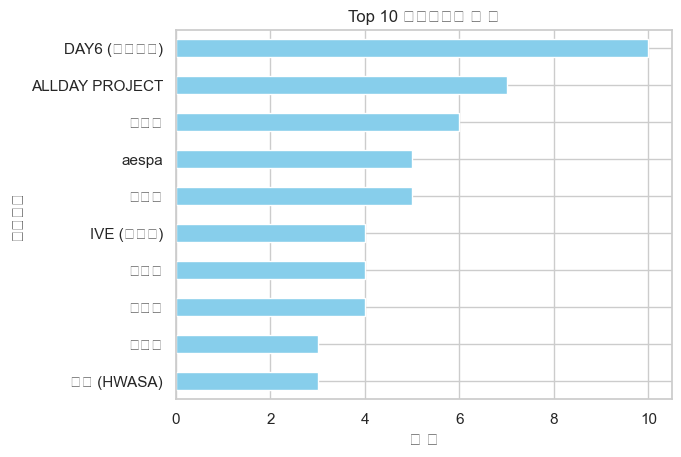

In [416]:
# 아티스트별 곡 수 집계
# concat_df에서 'Artist' 기준으로 그룹화(groupby)
artist_group = concat_df.groupby('Artist')

# 각 아티스트의 곡 수 계산
artist_count = artist_group['Title'].count()

# 곡 수 기준으로 내림차순 정렬
artist_count_sorted = artist_count.sort_values(ascending=False)

# 상위 10명 선택
top_10_artists = artist_count_sorted.head(10)

# 그래프를 그리기 위해 y축이 많은 값이 위로 오도록 정렬
# 가로 막대그래프에서는 sort_values()로 정렬 후 plot하면 자동 적용
top_10_artists_sorted = top_10_artists.sort_values()

# 가로 막대 그래프 그리기
top_10_artists_sorted.plot(kind='barh', color='skyblue')

# 그래프 레이블과 제목 추가
plt.xlabel('곡 수')                # x축 레이블
plt.ylabel('아티스트')            # y축 레이블
plt.title('Top 10 아티스트별 곡 수')  # 그래프 제목

plt.show()

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52897 (\N{HANGUL SYLLABLE KAEB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49808 (\N{HANGUL SYLLABLE SYUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\

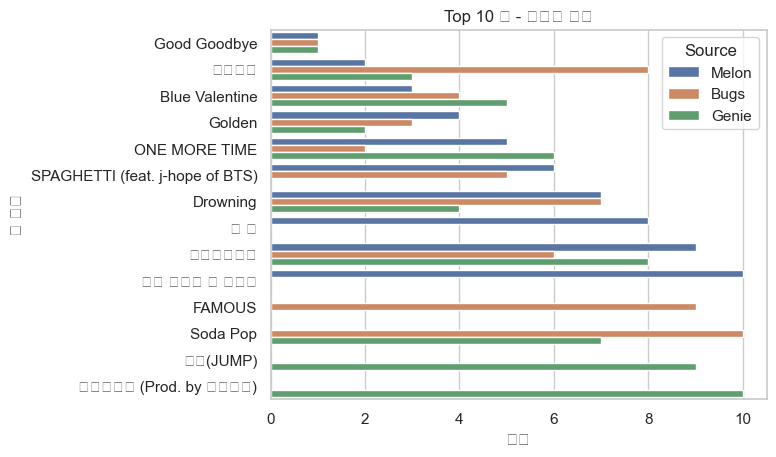

In [417]:
# 상위 10위 곡만 선택
# concat_df에서 '순위' 컬럼이 10 이하인 데이터만 추출
top_10_songs = concat_df[concat_df['순위'] <= 10]

# 시각화 스타일 설정
sns.set(style="whitegrid")  # 깔끔한 배경 스타일

# Source별로 색상을 다르게 해서 막대그래프 생성
# x='순위' → x축: 순위
# y='Title' → y축: 곡 제목
# hue='Source' → Source별로 색상 구분
sns.barplot(data=top_10_songs, x='순위', y='Title', hue='Source')

# 그래프 레이블 및 제목 추가
plt.xlabel('순위')                # x축 레이블
plt.ylabel('곡 제목')             # y축 레이블
plt.title('Top 10 곡 - 차트별 비교')  # 그래프 제목

plt.show()